In [1]:
import pandas as pd

import plotly.express as px

In [2]:
df = pd.read_csv('data/crypto.csv')

In [3]:
df.head()

Asset_Name   timestamp      Close
0  Bitcoin Cash  2018-01-01  2374.5900
1  Bitcoin Cash  2018-01-02  2323.3200
2  Bitcoin Cash  2018-01-03  2551.2850
3  Bitcoin Cash  2018-01-04  2557.6467
4  Bitcoin Cash  2018-01-05  2354.4433

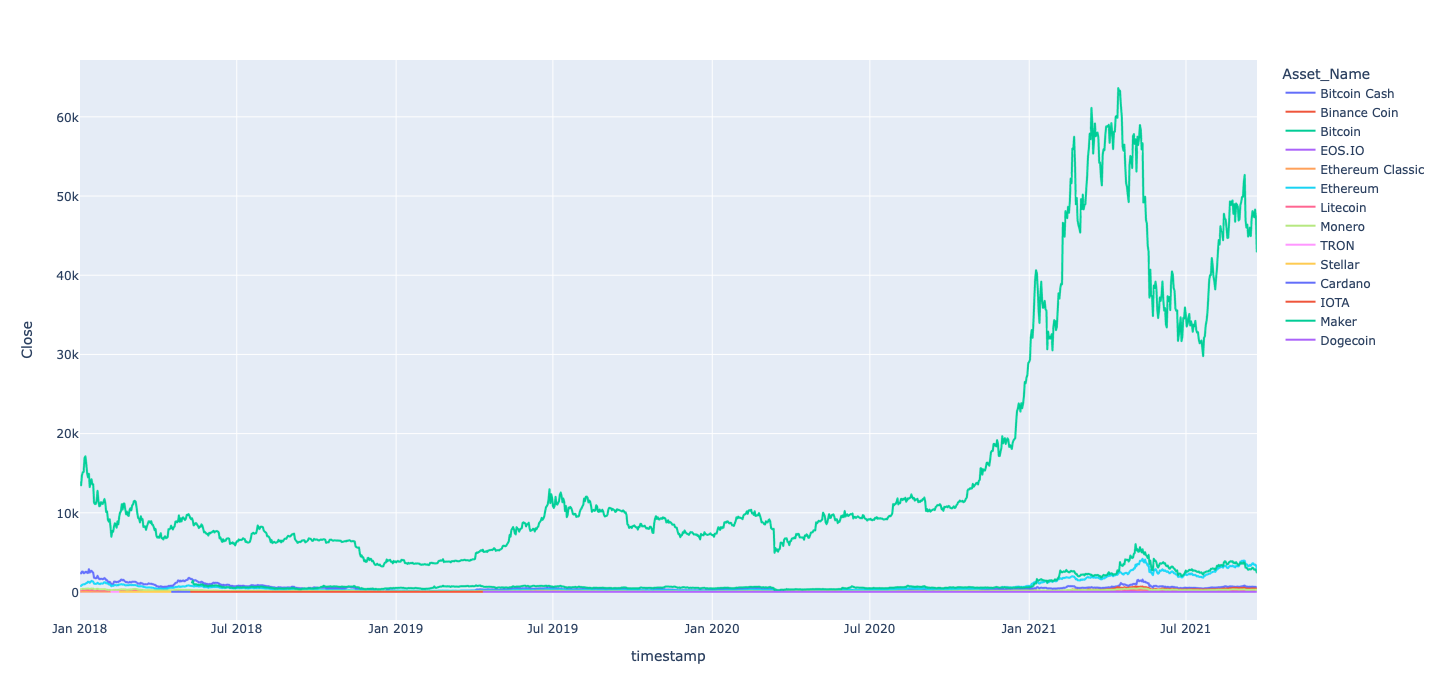

In [4]:
fig = px.line(df, x="timestamp", y="Close", color='Asset_Name', height=700)

fig.show()

In [5]:
df_bc = df[df['Asset_Name']=='Bitcoin'].copy()

In [6]:
df_bc['ma_3'] = df['Close'].rolling(3).mean()
df_bc['ma_7'] = df['Close'].rolling(7).mean()
df_bc['ma_14'] = df['Close'].rolling(14).mean()
df_bc['ma_30'] = df['Close'].rolling(30).mean()
df_bc['ma_60'] = df['Close'].rolling(60).mean()
df_bc['ma_90'] = df['Close'].rolling(90).mean()
df_bc['ma_365'] = df['Close'].rolling(365).mean()

df_bc['std_3'] = df['Close'].rolling(3).std()
df_bc['std_7'] = df['Close'].rolling(7).std()
df_bc['std_14'] = df['Close'].rolling(14).std()
df_bc['std_30'] = df['Close'].rolling(30).std()
df_bc['std_90'] = df['Close'].rolling(90).std()

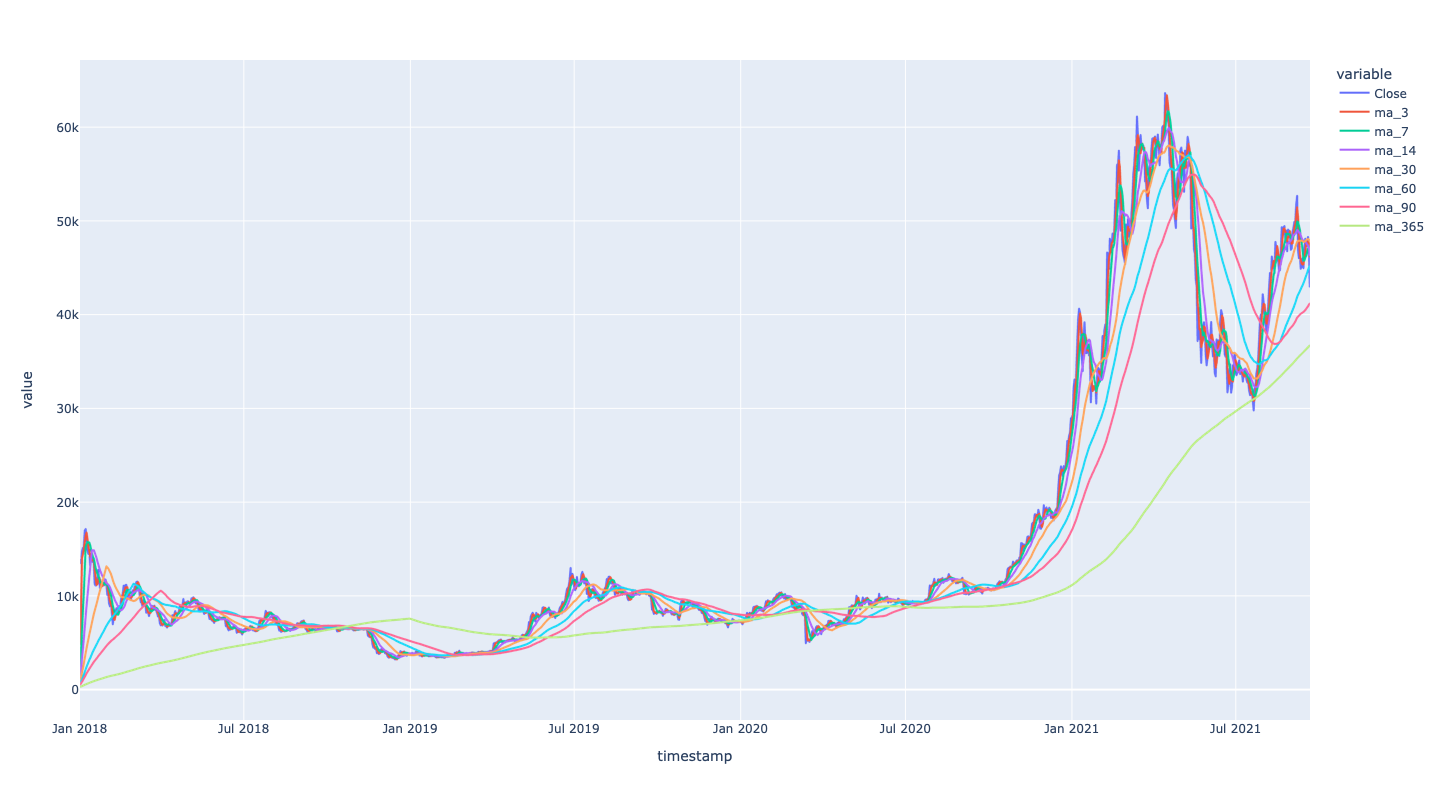

In [7]:
px.line(df_bc, x="timestamp", y=["Close", 'ma_3', 'ma_7', 'ma_14', 'ma_30', 'ma_60', 'ma_90', 'ma_365'], height=800)

In [8]:
df_bc.head()

Asset_Name   timestamp      Close          ma_3          ma_7  \
2720    Bitcoin  2018-01-01  13850.176   4874.235000   2327.916429   
2721    Bitcoin  2018-01-02  13468.698   9227.543833   4190.465429   
2722    Bitcoin  2018-01-03  14743.424  14020.766000   6236.032857   
2723    Bitcoin  2018-01-04  15107.792  14439.971333   8336.163357   
2724    Bitcoin  2018-01-05  15158.492  15003.236000  10443.015857   

            ma_14        ma_30        ma_60        ma_90      ma_365  \
2720  1369.124536   895.995550   630.334742   520.549194  278.825116   
2721  2301.528571  1328.332183   849.795167   666.771017  315.659938   
2722  3324.506393  1804.030433  1090.471100   827.454394  355.990425   
2723  4374.947214  2290.859567  1337.200092   992.212356  397.314338   
2724  5428.840929  2780.237383  1584.635358  1157.413506  438.776729   

            std_3        std_7       std_14       std_30       std_90  
2720  7773.425512  5080.884119  3592.328354  2446.994770  1422.626001  
2721  7678.633504  6469.503473  4812.490324  3352.575915  1971.166824  
2722   654.260884  7291.759114  5802.500694  4145.611420  2466.607791  
2723   860.650873  7448.419730  6519.507891  4794.335118  2888.712068  
2724   226.427315  6898.434163  7002.847503  5322.967663  3250.599260

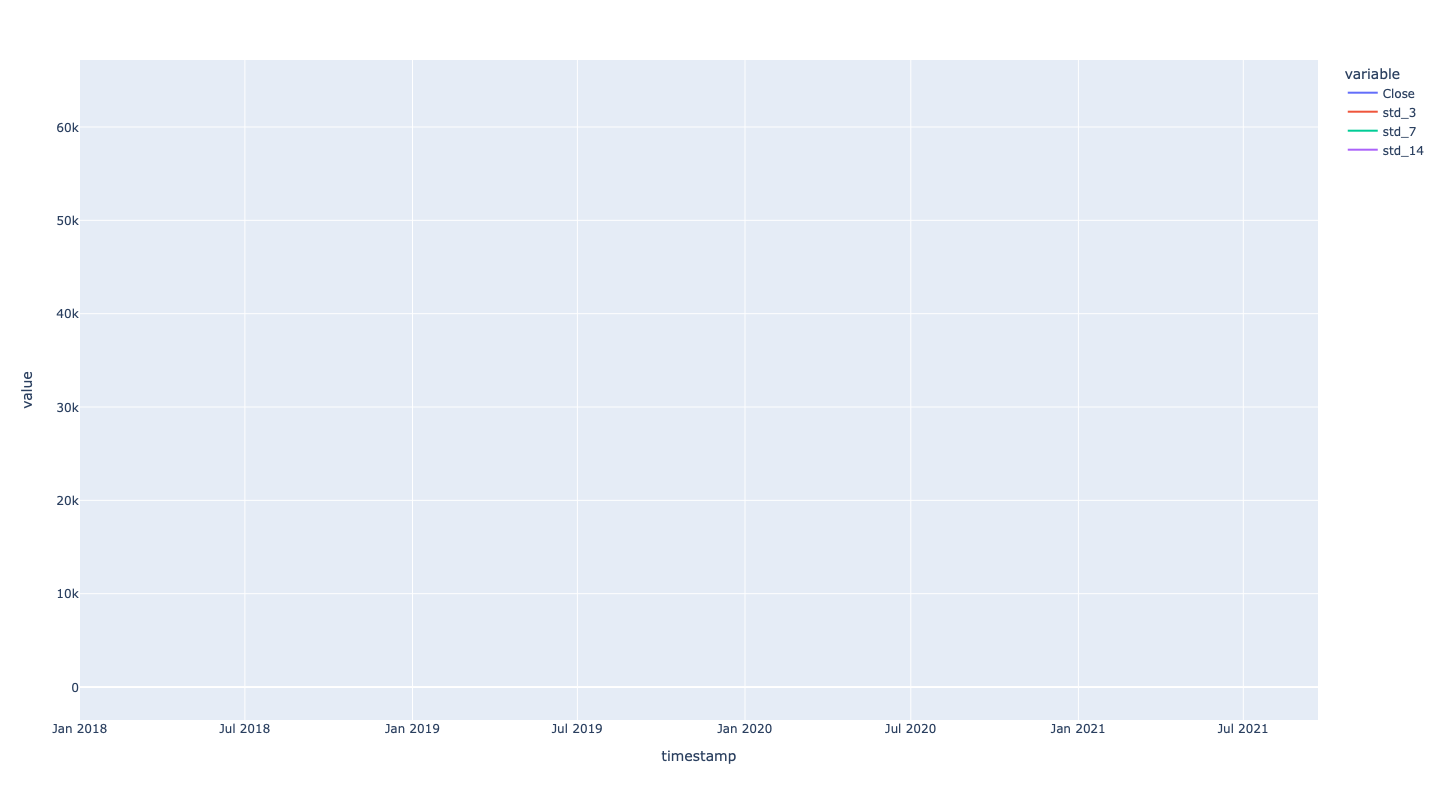

In [9]:
px.line(df_bc, x="timestamp", y=["Close", 'std_3', 'std_7', 'std_14'], height=800)

In [10]:
df_bc['boll_3+'] = df_bc['ma_3'] + 2*df_bc['std_3']
df_bc['boll_3-'] = df_bc['ma_3'] - 2*df_bc['std_3']

df_bc['boll_30+'] = df_bc['ma_30'] + 2*df_bc['std_30']
df_bc['boll_30-'] = df_bc['ma_30'] - 2*df_bc['std_30']

df_bc['boll_90+'] = df_bc['ma_90'] + 2*df_bc['std_90']
df_bc['boll_90-'] = df_bc['ma_90'] - 2*df_bc['std_90']

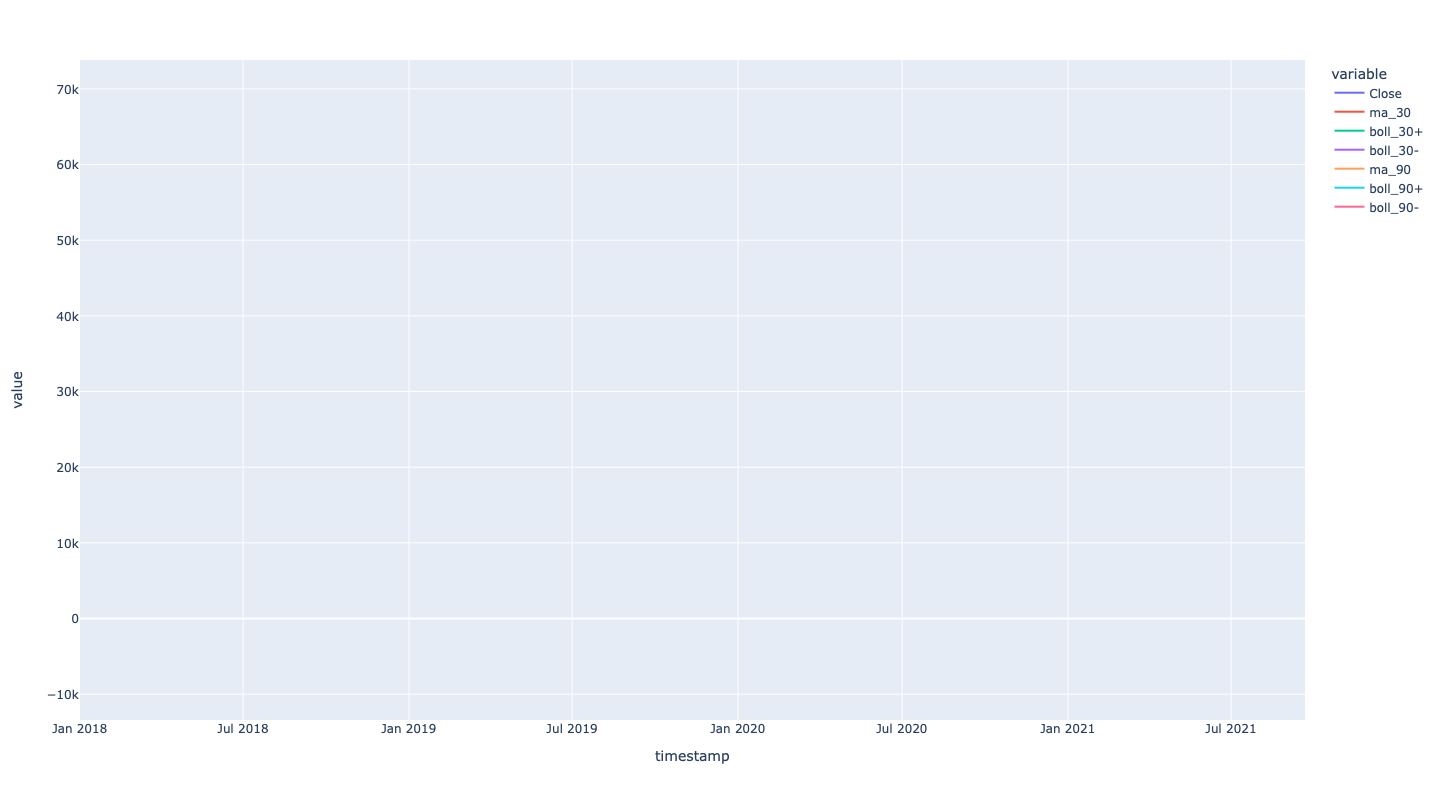

In [11]:
px.line(df_bc, x="timestamp", y=["Close", 'ma_30', 'boll_30+', 'boll_30-', 'ma_90', 'boll_90+', 'boll_90-'], height=800)